# Import necessary libraries

In [ ]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualization

### Load the weather dataset

In [ ]:
dataset = pd.read_csv("WeatherHistory.csv")
dataset.head()

### Display basic information about the dataset

In [ ]:
# Check for missing values in each column
dataset.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
# Get summary statistics for numerical columns
dataset.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
# Display info about dataset: column names, data types, non-null counts
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
# Fill missing values in 'Precip Type' column using forward fill
dataset['Precip Type'] = dataset['Precip Type'].fillna(method='ffill')

C:\Users\arbaz\AppData\Local\Temp\ipykernel_26440\1887429991.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset['Precip Type'] = dataset['Precip Type'].fillna(method='ffill')


In [ ]:
# Import LabelEncoder for encoding categorical variables
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
# Encode object (categorical) columns into numeric values
for col in ["Formatted Date", "Summary","Precip Type", "Daily Summary"]:  # Only object columns
    dataset[col] = lb.fit_transform(dataset[col])


In [ ]:
# Convert 'Formatted Date' to datetime format
dataset['Formatted Date'] = pd.to_datetime(dataset['Formatted Date'], unit='s', errors='coerce')

In [ ]:
# Check correlation of numeric columns with 'Temperature (C) '
dataset.corr()['Temperature (C) ']

Formatted Date             -0.059024
Summary                    -0.115673
Precip Type                 1.000000
Temperature (C)            -0.562620
Apparent Temperature (C)   -0.565207
Humidity                    0.232113
Wind Speed (km/h)          -0.067928
Wind Bearing (degrees)     -0.041984
Visibility (km)            -0.312875
Loud Cover                       NaN
Pressure (millibars)        0.009008
Daily Summary              -0.250244
Name: Precip Type, dtype: float64

## ---- Visualization Section ----

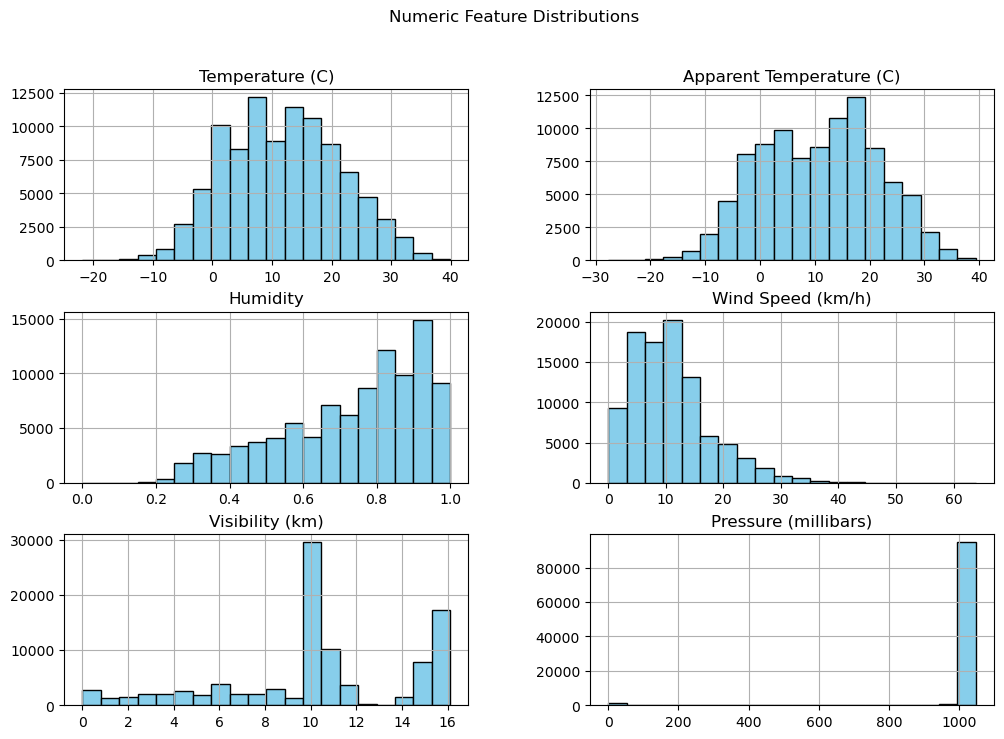

In [ ]:
# List of numeric columns to analyze
numeric_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
                'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
# Plot histograms for numeric columns to see distributions
dataset[numeric_cols].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Numeric Feature Distributions')
plt.show()


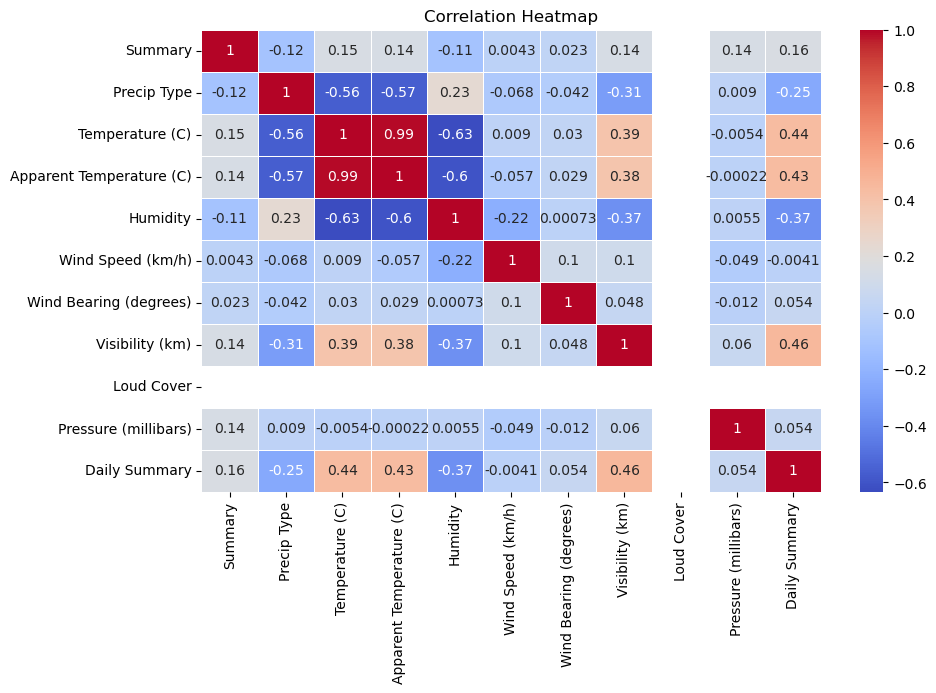

In [ ]:
# Plot a heatmap of correlations between numeric features
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


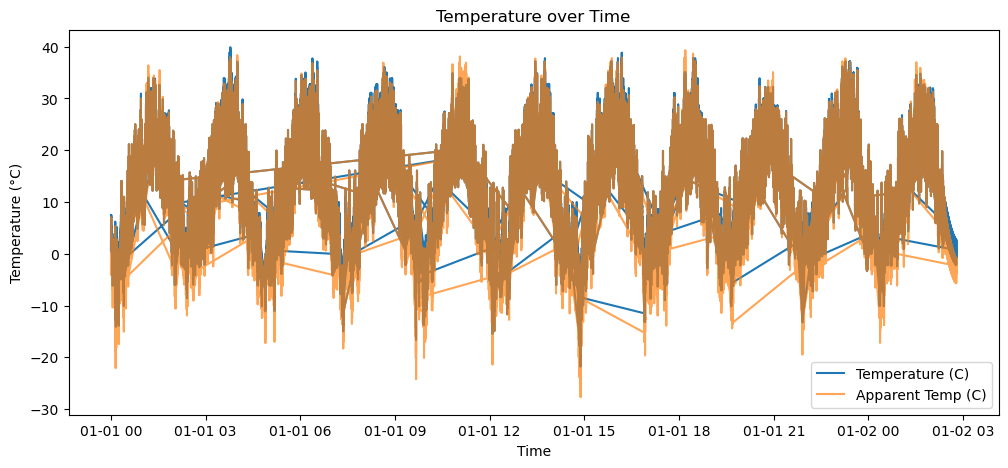

In [ ]:
# Plot Temperature and Apparent Temperature over time
# Pairplot to visualize relationships between numeric features
plt.figure(figsize=(12,5))
plt.plot(dataset['Formatted Date'], dataset['Temperature (C)'], label='Temperature (C)')
plt.plot(dataset['Formatted Date'], dataset['Apparent Temperature (C)'], label='Apparent Temp (C)', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time')
plt.legend()
plt.show()


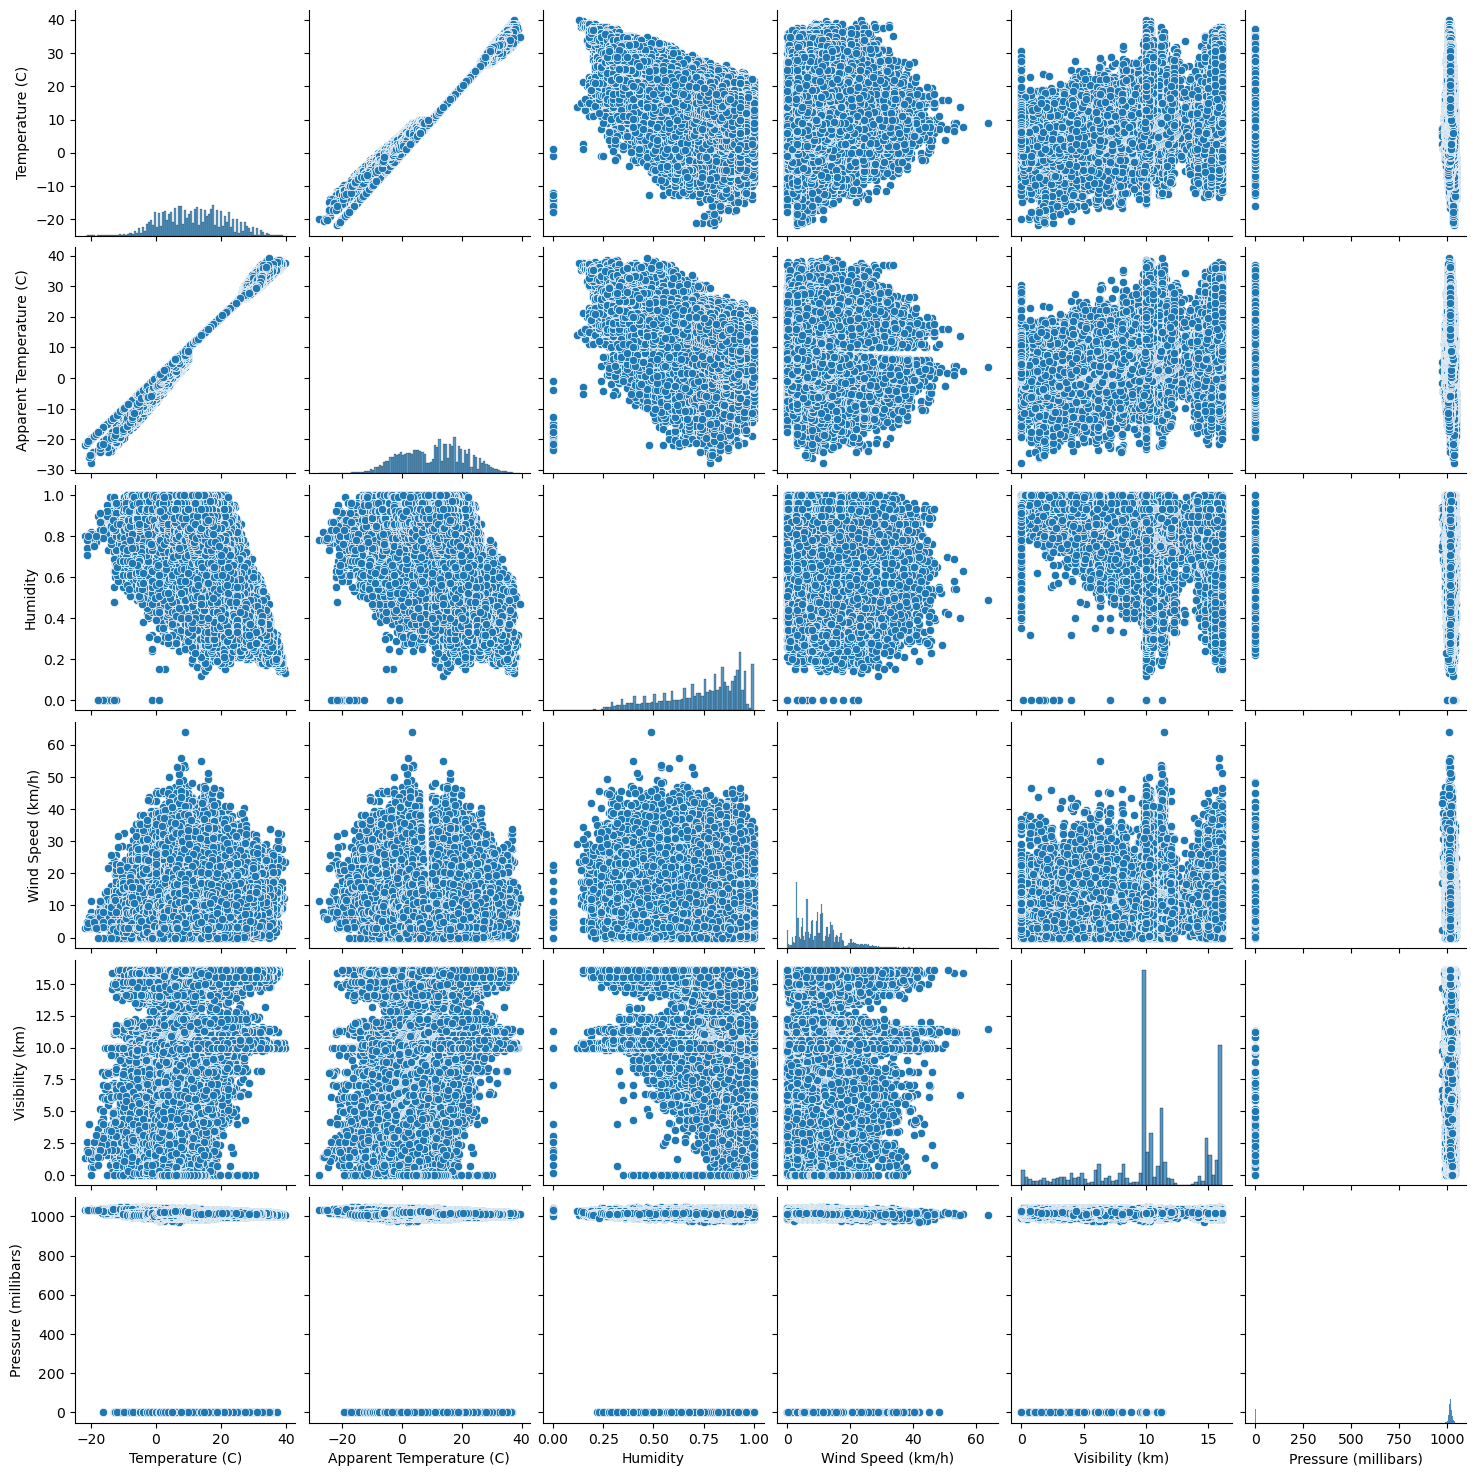

In [ ]:
# Pairplot to visualize relationships between numeric features
sns.pairplot(dataset[numeric_cols])
plt.show()

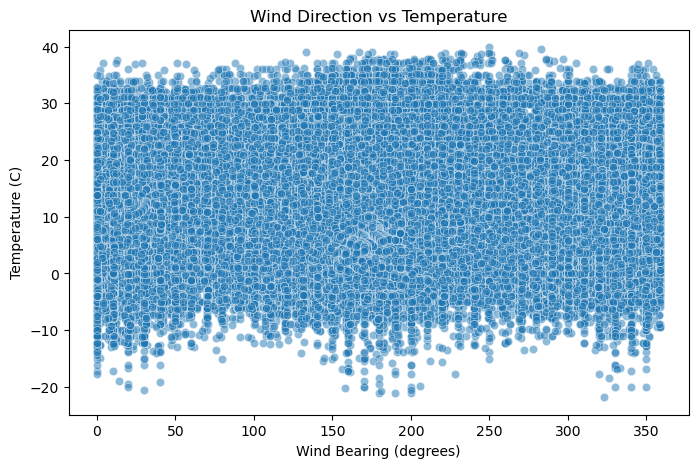

In [ ]:
# Scatter plot to visualize relationship between Wind Bearing and Temperature
plt.figure(figsize=(8,5))
sns.scatterplot(x='Wind Bearing (degrees)', y='Temperature (C)', data=dataset, alpha=0.5)
plt.title('Wind Direction vs Temperature')
plt.show()

# ---- Model Preparation ----

In [ ]:
# Prepare features (X) and target (y) for regression
X = dataset.drop(['Formatted Date','Temperature (C)'],axis = 1)
y = dataset['Temperature (C)']

In [ ]:
# Split dataset into training and testing sets (70% train, 30% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## ---- DecisionTree Regression ----


In [ ]:
# Import DecisionTreeRegressor from sklearn
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42, max_depth = 10)
# Train the model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
# Calculate evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")


R² Score: 1.000
Mean Absolute Error: 0.072
Mean Squared Error: 0.023


### Results: Actual vs Predicted MPG


In [22]:
# Compare first few actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison


,Actual,Predicted
0,28.122222,27.803014
1,10.000000,9.918981
2,14.400000,14.390940
3,1.016667,1.092519
4,-0.122222,-0.212402
...,...,...
28931,17.150000,17.168550
28932,-1.144444,-1.105499
28933,19.005556,18.997716
28934,12.777778,12.770693


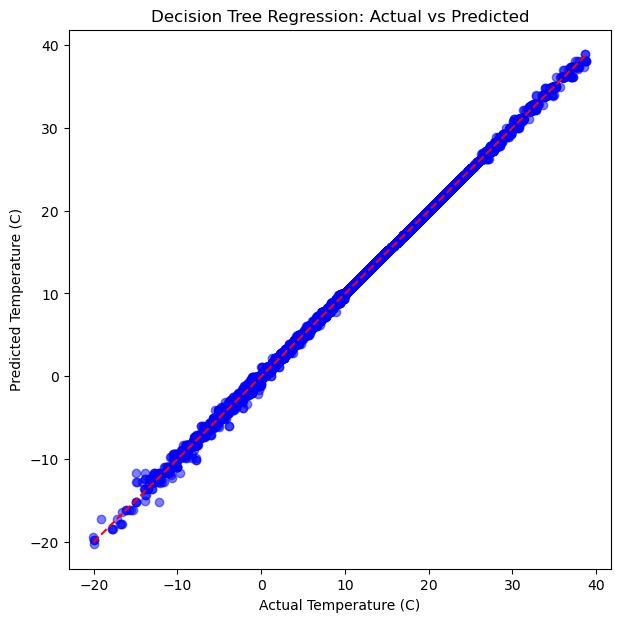

In [ ]:
# Scatter plot to visualize Actual vs Predicted Temperature

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Temperature (C)")
plt.ylabel("Predicted Temperature (C)")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.show()
